# How to count objects

```python
H, W = image.shape[:2]
counted = np.zeros_like(image)
cnt = 0
stack = []

for h in range(H):
    for w in range(W):
        pixel = image[h,w]
        if pixel is not background but object:
            if the pixel is alread counted (counted[h,w] > 0):
                continue
            else:
                Generate a stack and insert the pixel idx [h,w] into the stack
                while the stack is not empty:
                    Pop one pixel idx up from the stack
                    Count this pixel with cnt and update counted matrix
                    Generate the neighbor list with 8 surrounding pixels
                    for pixel in neighbors:
                            if pixel is out of bound:
                                continue
                            elif pixel is already counted:
                                continue
                            elif pixel is background
                                continue
                            else:
                                Insert this pixel to the stack for counting
                Increase cnt by 1
```

In [1]:
import numpy as np
import cv2

image = cv2.imread("birds.jpg")

H, W = image.shape[:2]
counted = np.zeros_like(image)
cnt = 0
stack = []
background = 0

for h in range(H):
    for w in range(W):
        pixel = image[h, w]
        if pixel[0] == 0 and pixel[1] == 255:
            if counted[h, w] > 0:
                continue
            else:
                stack.append((h, w))
                while stack:
                    h, w = stack.pop()
                    counted[h, w] = cnt
                    neighbors = [(h - 1, w - 1), (h - 1, w), (h - 1, w + 1),
                                 (h, w - 1), (h, w + 1),
                                 (h + 1, w - 1), (h + 1, w), (h + 1, w + 1)]
                    for nh, nw in neighbors:
                        if nh < 0 or nw < 0 or nh >= H or nw >= W:
                            continue
                        elif counted[nh, nw] > 0:
                            continue
                        elif np.array_equal(image[nh, nw], background):
                            continue
                        else:
                            stack.append((nh, nw))
                cnt += 1

print(f'Total: {cnt}')

Total: 0


# Implement the algorithm and Verify your implementation with the following image for testing

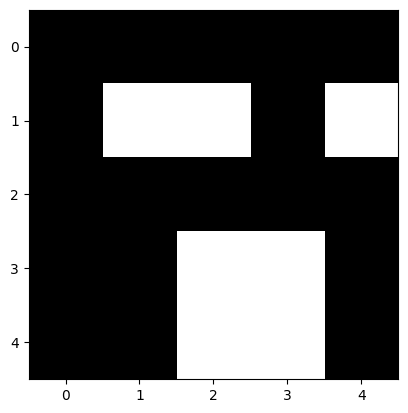

In [3]:
import numpy as np
import matplotlib.pyplot as plt


image = np.zeros((5,5), dtype = 'uint8')

image[1,1:3] = 255
image[1, 4] = 255
image[3:5, 2:4] = 255


plt.imshow(image, cmap='gray')
plt.show()

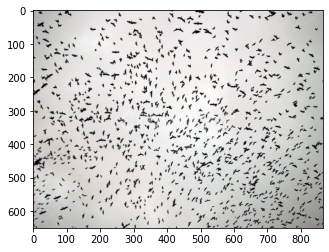

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("bird.jpg")


plt.imshow(image)
plt.show()

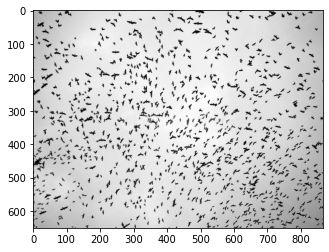

In [2]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray ,cmap = 'gray')
plt.show()

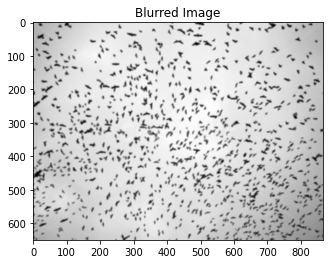

In [3]:
# 해도 되고 안해도 되고

mask_size = 5
mask = np.ones((mask_size, mask_size), np.float32)/(mask_size**2)
image_blurred = cv2.filter2D(image_gray,-1, mask)

plt.imshow(image_blurred, cmap='gray')
plt.title('Blurred Image')
plt.show()

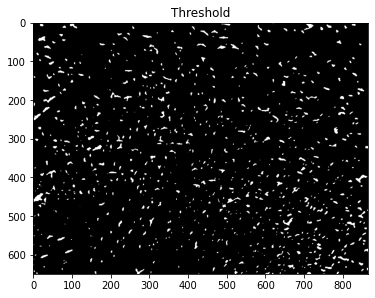

In [4]:
rct, image_thresh = cv2.threshold(image_blurred, 100, 255, cv2.THRESH_BINARY_INV)   # 임계값 설정 (150 미만 시 흑색, 초과 시 백색)

plt.figure(figsize=(6,5))
plt.imshow(image_thresh, cmap = 'gray')
plt.title('Threshold')
plt.show()

5. Open  

이미지의 작은 구조나 잡음을 제거하고 객체의 경계를 부드럽게 만들어주는 역할

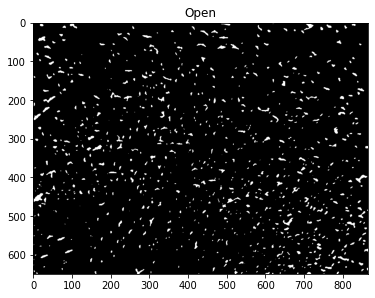

In [5]:
mask_size = 1
mask = np.ones((mask_size, mask_size))
image_open = cv2.morphologyEx(image_thresh, cv2.MORPH_OPEN, mask, iterations=4) # iterations=반복횟수

plt.figure(figsize=(6,5))
plt.imshow(image_open, cmap = 'gray')
plt.title('Open')
plt.show()

6. Contour detection

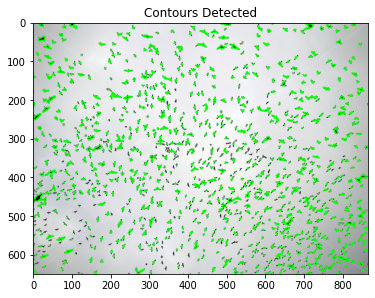

In [6]:
contours, _ = cv2.findContours( # 윤곽선 검색
    image_open, # 찾을 이미지
    mode = cv2.RETR_LIST,   # 윤곽선 검색 모드
    method = cv2.CHAIN_APPROX_SIMPLE    # 윤곽선 근사화(꼭짓점만 저장하며 메모리 절약)
)
image_copy = image[:,:,::-1].copy()

cv2.drawContours(image_copy, contours=contours, contourIdx=-1, color=(0,255,0), thickness=2)
plt.figure(figsize=(6,5))
plt.imshow(image_copy, cmap = 'gray')
plt.title('Contours Detected')
plt.show()

7. Object detection and Count

곡선길이, 픽셀 수 사용해서 면적 계산
둘레, 면적 계산하여 일정 크기 이상의 영역을 가진 컨투어 추출

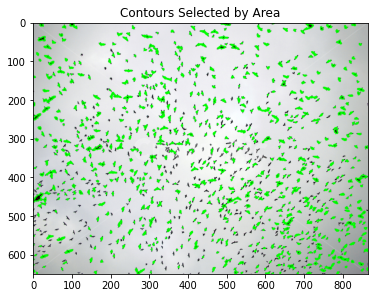

Total: 733


In [9]:
perimeters = []
areas = []
for c in contours:
    perimeter = cv2.arcLength(c, closed=True)
    perimeters.append(perimeter)
    area = cv2.contourArea(c)
    areas.append(area)

th_area = 2  # 면적이 20 초과하는 컨투어만 추출
image_copy = image[:,:,::-1].copy()
cnt = 0
contours_final = []
for i in range(len(areas)):
    if areas[i] > th_area:
        cnt += 1
        contours_final.append(contours[i])

cv2.drawContours(image_copy, contours_final, \
                 contourIdx=-1, color = (0, 255, 0), thickness=2)

plt.figure(figsize=(6,5))
plt.imshow(image_copy, cmap = 'gray')
plt.title('Contours Selected by Area')
plt.show()
print(f'Total:',(cnt))